In [1]:
using DataFrames
using Plots, LaTeXStrings
using JLD2
using Statistics, JuMP
using Plots.PlotMeasures

In [2]:
function mon(array)
    result = Float64[]
    last = array[1]
    for elt in array
      new_last = minimum([elt, last])
      push!(result, new_last)
      last = new_last
    end
    return result
end
RANGE = 0:1:900
function refine(valuevec, timevec, trange = RANGE)
    new_values = Float64[]
    for t in trange
        push!(new_values, valuevec[searchsortedfirst(timevec[2:end], t)])
    end
    return new_values
end

refine (generic function with 2 methods)

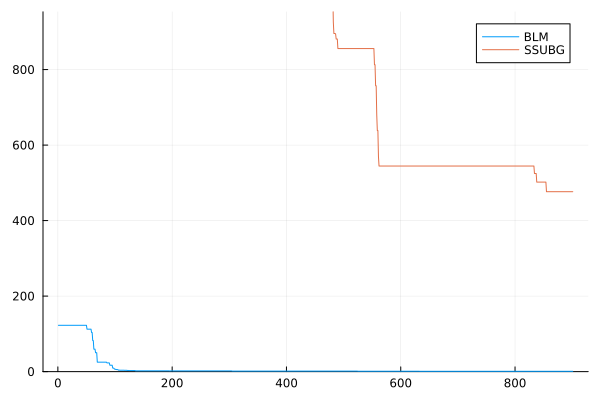

In [17]:
idx=3
FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunCA$(idx).jld2")[3])
XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodCA$(idx).jld2")
XSSUBG, ITSSUBG, SSUBG, TSSUBG = load_object("..//results//15min_runs//StochasticSubGCA$(idx).jld2")
SSUBG = mon(refine(FS .- SSUBG, TSSUBG))
BLM = mon(refine(FS .- BLM, TBLM))
plot(BLM, label="BLM")
plot!(SSUBG, label = "SSUBG", ylims=(0, 2*minimum(SSUBG)))

In [11]:
function load_belgian(eps)
    matrixBLM = []
    matrixBPLM = []
    matrixSUBG = []
    matrixSSUBG = []
    matrixSGEP = []
    matrixDA = []
    matrixDWG = []
    matrixFGM = []
    matrixSUBGL = []
    matrixCG = []
    matrixFS = []
    for idx=1:8
        FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunBE$(idx).jld2")[3])
        XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodBE$(idx).jld2")
        XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-BE$(idx).jld2")
        XSUBG, ITSUBG, SUBG, TSUBG = load_object("..//results//15min_runs//SubGBE$(idx).jld2")
        XSSUBG, ITSSUBG, SSUBG, TSSUBG = load_object("..//results//15min_runs//StochasticSubGBE$(idx).jld2")
        XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-BE$(idx).jld2")
        XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationBE$(idx).jld2")
        XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGBE$(idx).jld2")
        XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMBE$(idx).jld2")
        XSUBGL, ITSUBGL, SUBGL, TSUBGL = load_object("..//results//15min_runs//LSUBGBE$(idx).jld2")
        XCG, ITCG, CG, TCG = load_object("..//results//15min_runs//ColumnGeneration-BE$(idx).jld2")
        FS = maximum([FS, maximum(CG)])
        CG = mon(refine(FS .- CG, TCG))
        BLM = mon(refine(FS .- BLM, TBLM))
        BPLM = mon(refine(FS .- BPLM, TBPLM))
        SUBG = mon(refine(FS .- SUBG, TSUBG))
        SSUBG = mon(refine(FS .- SSUBG, TSSUBG))
        SGEP = mon(refine(FS .- SGEP, TSGEP))
        DA = mon(refine(FS .- DA, TDA))
        DWG = mon(refine(FS .- DWG, TDWG))
        FGM = mon(refine(FS .- FGM, TFGM))
        SUBGL = mon(refine(FS .- SUBGL, TSUBGL))
        push!(matrixFS, FS * (eps))
        push!(matrixBLM, BLM)
        push!(matrixCG, CG)
        push!(matrixBPLM, BPLM)
        push!(matrixSUBG, SUBG)
        push!(matrixSSUBG, SSUBG)
        push!(matrixSGEP, SGEP)
        push!(matrixDA, DA)
        push!(matrixDWG, DWG)
        push!(matrixFGM, FGM)
        push!(matrixSUBGL, SUBGL)
    end
    return mean(matrixBLM), mean(matrixBPLM), mean(matrixSUBG), mean(matrixSGEP), mean(matrixDA), mean(matrixDWG), mean(matrixFGM), mean(matrixSUBGL), mean(matrixCG), mean(matrixSSUBG), mean(matrixFS)
end
function load_californian(eps)
    matrixBLM = []
    matrixBPLM = []
    matrixSUBG = []
    matrixSGEP = []
    matrixDA = []
    matrixDWG = []
    matrixFGM = []
    matrixSUBGL = []
    matrixCG = []
    matrixFS = []
    for idx=1:20
        if idx ∉ [9 10 11 12]
        FS = maximum(load_object("..//results//optimal_values//NewRefinedOptRunCA$(idx).jld2")[3])
        XBLM, ITBLM, BLM, TBLM = load_object("..//results//15min_runs//BundleLevelMethodCA$(idx).jld2")
        XBPLM, ITBPLM, BPLM, TBPLM = load_object("..//results//15min_runs//BundleProximalLevelMethod-L-CA$(idx).jld2")
        XSUBG, ITSUBG, SUBG, TSUBG = load_object("..//results//15min_runs//SubGCA$(idx).jld2")
        XSGEP, ITSGEP, SGEP, TSGEP = load_object("..//results//15min_runs//SubG-EP-CA$(idx).jld2")
        XDA, ITDA, DA, TDA = load_object("..//results//15min_runs//D-AdaptationCA$(idx).jld2")
        XDWG, ITDWG, DWG, TDWG = load_object("..//results//15min_runs//DowGCA$(idx).jld2")
        XFGM, ITFGM, FGM, TFGM = load_object("..//results//15min_runs//FGMCA$(idx).jld2")
        XSUBGL, ITSUBGL, SUBGL, TSUBGL = load_object("..//results//15min_runs//LSUBGCA$(idx).jld2")
        XCG, ITCG, CG, TCG = load_object("..//results//15min_runs//ColumnGeneration-CA$(idx).jld2")
        FS = maximum([FS, maximum(CG)])
        CG = mon(refine(FS .- CG, TCG))
        BLM = mon(refine(FS .- BLM, TBLM))
        BPLM = mon(refine(FS .- BPLM, TBPLM))
        SUBG = mon(refine(FS .- SUBG, TSUBG))
        SGEP = mon(refine(FS .- SGEP, TSGEP))
        DA = mon(refine(FS .- DA, TDA))
        DWG = mon(refine(FS .- DWG, TDWG))
        FGM = mon(refine(FS .- FGM, TFGM))
        SUBGL = mon(refine(FS .- SUBGL, TSUBGL))
        push!(matrixFS, FS * (eps))
        push!(matrixBLM, BLM)
        push!(matrixCG, CG)
        push!(matrixBPLM, BPLM)
        push!(matrixSUBG, SUBG)
        push!(matrixSGEP, SGEP)
        push!(matrixDA, DA)
        push!(matrixDWG, DWG)
        push!(matrixFGM, FGM)
        push!(matrixSUBGL, SUBGL)
        end
    end
    return mean(matrixBLM), mean(matrixBPLM), mean(matrixSUBG), mean(matrixSGEP), mean(matrixDA), mean(matrixDWG), mean(matrixFGM), mean(matrixSUBGL), mean(matrixCG), mean(matrixFS)
end

load_californian (generic function with 1 method)

In [12]:
# LOAD BELGIAN
BelgianBLM, BelgianBPLM, BelgianSUBG, BelgianSUBGEP, BelgianDA, BelgianDOWG, BelgianFGM, BelgianSUBGL, BelgianCG, BelgianSSUBG, BelgianFS = load_belgian(5e-6)
# CalifornianBLM, CalifornianBPLM, CalifornianSUBG, CalifornianSUBGEP, CalifornianDA, CalifornianDOWG, CalifornianFGM, CalifornianSUBGL, CalifornianCG, CalifornianFS = load_californian(5e-6)

([2971.569061886519, 2971.569061886519, 2971.569061886519, 2971.569061886519, 2971.569061886519, 2971.569061886519, 2971.569061886519, 2971.569061886519, 2971.569061886519, 2924.1446639848873  …  81.66408747434616, 81.66408747434616, 81.66408747434616, 81.66408747434616, 81.51373128872365, 81.51373128872365, 81.51373128872365, 81.51373128872365, 81.51373128872365, 81.51373128872365], [2971.569061926566, 2971.569061926566, 2971.569061926566, 2971.569061926566, 2971.569061926566, 2971.569061926566, 2970.185867635533, 2970.185867635533, 2970.185867635533, 2970.185867635533  …  62.57283856533468, 62.57283856533468, 62.57283856533468, 62.57283856533468, 62.57283856533468, 62.57283856533468, 62.57283856533468, 62.57283856533468, 62.57283856533468, 62.22778989933431], [2971.569061889313, 2971.569061889313, 2971.569061889313, 2971.569061889313, 2971.569061889313, 2971.569061889313, 2971.569061889313, 2971.569061889313, 2971.569061889313, 2971.569061889313  …  152.75477633532137, 152.7547763353

In [13]:
BelgianSSUBG

901-element Vector{Float64}:
    6.1964319720931016e7
    1.4262201543299913e7
    5.902794306956487e6
    5.3473057003087e6
    5.3473057003087e6
    5.248338747625358e6
    4.013005955436931e6
    2.5932843448268156e6
    1.8472854327900065e6
    1.5195476957288608e6
    ⋮
 2623.4674773728475
 2623.4674773728475
 2623.4674773728475
 2623.4674773728475
 2623.4674773728475
 2623.4674773728475
 2623.4674773728475
 2623.4674773728475
 2623.4674773728475

In [14]:
plot(
    title = "Belgian dataset",
    xlabel = "Time " * L"(t)" * " (seconds)",
    ylabel = L"\mathcal{L}_* - \mathcal{L}(t)",
    xlims=(0,900),
    ylims=(0,3000),
    xticks=0:60:900,
    xscale=:identity,
    titlefontsize=10,
    labelfontsize=10,
    size=(1600,900),
    bottom_margin = 15px,
    left_margin = 30px
)
plot!(BelgianBPLM, label = "Bundle Proximal Level", linecolor = :orchid)
plot!(BelgianBLM, label = "Bundle Level", linecolor = :plum4)
plot!(BelgianSUBGL, label = "Last-iterate optimal Subgradient", linecolor = :deepskyblue)
plot!(BelgianSUBGEP, label = "Estimated Polyak Subgradient", linecolor = :royalblue1)
plot!(BelgianSUBG, label = "Subgradient", linecolor = :navyblue)
plot!(BelgianSSUBG, label = "Stochastic Subgradient", linecolor = :slateblue2)
plot!(BelgianDA, label = "D-Adaptation", linecolor = :tan2)
plot!(BelgianDOWG, label = "DoWG", linecolor = :sienna4)
plot!(BelgianFGM, label = "Fast Gradient", linecolor = :gold)
plot!(BelgianCG, label = "Dantzig-Wolfe", linecolor = :green)

hline!([BelgianFS], label = L"5 \times 10^{-6}" * " relative error", linecolor =:black)
savefig("OnePlotBelgian.pdf")

"c:\\Users\\Sofiane\\Documents\\ConvexHullPricing.jl\\notebooks\\OnePlotBelgian.pdf"

In [34]:
plot(
    title = "Californian dataset",
    xlabel = "Time " * L"(t)" * " (seconds)",
    ylabel = L"\mathcal{L}_* - \mathcal{L}(t)",
    xlims=(0,900),
    ylims=(0,110),
    xticks=0:60:900,
    xscale=:identity,
    titlefontsize=10,
    labelfontsize=10,
    size=(1600,900),
    bottom_margin = 15px,
    left_margin = 30px
)
plot!(CalifornianBPLM, label = "Bundle Proximal Level", linecolor = :orchid)
plot!(CalifornianBLM, label = "Bundle Level", linecolor = :plum4)
plot!(CalifornianSUBGL, label = "Last-iterate optimal Subgradient", linecolor = :deepskyblue)
plot!(CalifornianSUBGEP, label = "Estimated Polyak Subgradient", linecolor = :royalblue1)
plot!(CalifornianSUBG, label = "Subgradient", linecolor = :navyblue)
plot!(CalifornianDA, label = "D-Adaptation", linecolor = :tan2)
plot!(CalifornianDOWG, label = "DoWG", linecolor = :sienna4)
plot!(CalifornianFGM, label = "Fast Gradient", linecolor = :gold)
plot!(CalifornianCG, label = "Dantzig-Wolfe", linecolor = :green)

hline!([CalifornianFS], label = L"5 \times 10^{-6}" * " relative error", linecolor =:black)
savefig("OnePlotCalifornian.pdf")

"c:\\Users\\Sofiane\\Documents\\ConvexHullPricing.jl\\notebooks\\OnePlotCalifornian.pdf"